# Lab 5: Nearest Neighbors (and linear regression) in sklearn

This is a 'light' version of PS3.  We ask you to perform similar tasks
here as in PS3, just use sklearn functions (PS3 asks you to implement
these).  You also don't have play with metrics, normalization and
such.

### References: 
 * [Scikit Learn Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html)
 * [Introduction to Statistical Learning, Lab #3](http://www-bcf.usc.edu/~gareth/ISL/Chapter%204%20Lab.txt)


In [1]:
import numpy as np
import pandas as pd
import os
import sklearn.neighbors as nn
# use nn.KNeighborsRegressor for numeric target
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 
# use lm.LinearRegression
from functools import reduce

### Exercise: Predict 2017 Arctic Sea Ice Minimum

Your task now is to predict the Arctic Sea Ice minimum for 2017
September (thi minimum typically occurs in September while maximum
           between February to April).

# 1.1 Load data

(done for you)

Load 2017 Arctic ice extent data and try to predict 2017 September
minimum.  Compare the performance of linear regression and k-NN.  Use
cross-validation to assess the performance and pick the best model.

In [2]:
## Read the data and transform to a wide form
sie = pd.read_csv(os.path.join(os.environ["HOME"], "Documents", "INFO 371", "Labs", "N_extent_v2.1.csv.gz"))
# note: edit the path to correspond to where you downloaded the file
sie = sie.rename(columns=lambda x: x.strip())
sie.set_value(sie["extent"] < 0, "extent", np.nan)
sie.set_value(sie["area"] < 0, "area", np.nan)
print("Original data description\n", sie.describe())

years = np.sort(sie["year"].unique())
print(len(years), "unique years:\n", years)
data = pd.DataFrame(np.ones(len(years)), columns=["const"],
                    index = years)
data["year"] = pd.Series(years, index = years)
# add year as a variable, to simplify later handling

for m in range(1,13):
    md = sie["extent"][sie["mo"] == m].values
    idx = sie["year"][sie["mo"] == m].values
    data["ext"+str(m)] = pd.Series(md, index = idx)
print(data.head(3))
print(data.tail(3)) 


/home/kriarvi95/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Original data description
               year          mo      extent        area
count   462.000000  462.000000  460.000000  460.000000
mean   1997.584416    6.487013   11.769717    9.314935
std      11.130483    3.470802    3.166745    3.207328
min    1978.000000    1.000000    3.630000    2.370000
25%    1988.000000    3.000000         NaN         NaN
50%    1998.000000    6.000000         NaN         NaN
75%    2007.000000    9.750000         NaN         NaN
max    2017.000000   12.000000   16.520000   13.870000
40 unique years:
 [1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
      const  year   ext1   ext2   ext3   ext4   ext5   ext6   ext7  ext8  \
1978    1.0  1978    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
1979    1.0  1979  15.60  16.38  16.52  15.56  14.09  12.65  10.52  8.18   
1980    1.0  1980  15.05  16

## 1.2 Data description.

Calculate and explain: how does the data look like?  How many years of
it do we have?  How many missings?  Do a plot that you think helps in
explaining the data.

Dimensions of Data: (40, 14)
40 unique years:
 [1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
Number of Missings: 14


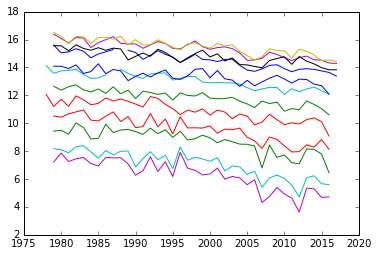

In [3]:
# your turn

print("Dimensions of Data: " + str(data.shape))
years = np.sort(sie["year"].unique())
print(len(years), "unique years:\n", years)
missings = data.isnull().any().count()
print("Number of Missings: " + str(missings))

x = data["year"]
# print(x)
y = data["ext1"]

# print(y)

plt.plot(data.ix[:, data.columns.difference(["year", "const"])])
plt.show()

## 1.3 Predict the minimum by 1-NN using the March maximum as the predictor

Now estimate the 1-NN model for these years.  Pick the March value
('ext3') as the predictor.  Use all all available
years as training data.  Use this model to predict September SIE
minimum (March 2017 = 14.43).  Which year SIE minimum does this value
correspond to?

In [4]:
# here...
x = data.loc[range(1979,2016)].as_matrix(["ext3"])
y = data.loc[range(1979,2016)].as_matrix(["ext9"])

# print(x)
# print(y)

model = nn.KNeighborsRegressor(n_neighbors = 1)
f = model.fit(x,y)

prediction = f.predict(14.43)
print(prediction[0][0])

4.68


In [5]:
# here...

## 1.4 Do the same with linear regression.

Now repeat the process with linear regression.  Include two variables:
constant and March extent (ext3).

In [6]:
# here ...

# here...
x = data.loc[range(1979,2017)].as_matrix(["ext3"])
y = data.loc[range(1979,2017)].as_matrix(["ext9"])

# print(x)
# print(y)

model = lm.LinearRegression(1)
f = model.fit(x,y)

prediction = f.predict(14.43)
print(prediction[0][0])

4.58928189057


# 2. Cross-Validation: which model is better?
The predictions are slightly different.  Which one is better?

## 2.1 Split your data into training and test splits

(approx 75% for, training, 25 for test).  Name these something like
x\_train, y\_train, or something like that.


In [7]:
# Please use this seed, it will help ensure that your "random" split is the same "random" split used by the rest of the class
seed = np.random.seed(seed=13579)

# bdata_train, bdata_test, y_train, y_test = train_test_split(bdata.data, bdata.target, test_size=0.34, random_state=seed)
x_train, x_test = train_test_split(data, test_size=0.25, random_state=seed)

## 2.2 1-NN RMSE on test data

Now estimate your 1-NN model on the training data and calculate RMSE
on the test data.


In [8]:
x_train = x_train.dropna()

xTrain = x_train.as_matrix(['ext3'])
yTrain = x_train.as_matrix(['ext9'])
m = nn.KNeighborsRegressor(1)
f = m.fit(xTrain,yTrain)

prediction = f.predict(14.43)
print(prediction[0][0])

4.68


In [9]:
#Calculates the root mean square of a list; intended to be used for RMSE by passing in a list of errors.
def compute_rmse(inputList):
    squares = [x ** 2 for x in inputList]
    return np.sqrt(reduce(lambda x, y: x + y, squares) / len(squares))[0]

#Testing
rmseTrain = compute_rmse(xTrain)
print (rmseTrain)

15.5810209642


## 2.3 OLS RMSE on test data

Now estimate your 1-NN model on the training data and calculate RMSE
on the test data.


In [23]:
x_test = x_test.dropna()

xTest = x_test.as_matrix(['ext3'])
yTest = x_test.as_matrix(['ext9'])
m = lm.LinearRegression(1)
f = m.fit(xTest,yTest)

prediction = f.predict(14.43)
print(prediction[0][0])

print(compute_rmse(xTest))

4.94553895017
15.1739488928


## Based on your exercise, which model will you prefer?  Explain!

Linear Regression is smaller

# 3.  Play with hyperparameters

These models include hyperparameters $k$, and the selection of
predictors.  Obviously, August is an excellent predictor for
September, but unfortunately August 2017 data is not available.
Include also year trend in the OLS model.  (you may also add
quadratic/exppnential trends).



## 3.1 $k$-NN

Choose another $k$ and a different set of predictors than in 2.2.
Estimate your model on training data and report RMSE on test data.

Repeat the process with several other combinations of $k$ and
predictors.  Which model is the best?  Explain!

In [11]:
x_train = x_train.dropna()

xTrain = x_train.as_matrix(['ext3'])
yTrain = x_train.as_matrix(['ext9'])
m = nn.KNeighborsRegressor(5)
f = m.fit(xTrain,yTrain)

prediction = f.predict(14.43)
print(prediction[0][0])

4.914


In [12]:
x_train = x_train.dropna()

xTrain = x_train.as_matrix(['ext3'])
yTrain = x_train.as_matrix(['ext9'])
m = nn.KNeighborsRegressor(10)
f = m.fit(xTrain,yTrain)

prediction = f.predict(14.43)
print(prediction[0][0])

5.26


In [13]:
x_train = x_train.dropna()

xTrain = x_train.as_matrix(['ext3'])
yTrain = x_train.as_matrix(['ext9'])
m = nn.KNeighborsRegressor(15)
f = m.fit(xTrain,yTrain)

prediction = f.predict(14.43)
print(prediction[0][0])

5.682


In [14]:
x_train = x_train.dropna()

xTrain = x_train.as_matrix(['ext3'])
yTrain = x_train.as_matrix(['ext9'])
m = nn.KNeighborsRegressor(20)
f = m.fit(xTrain,yTrain)

prediction = f.predict(14.43)
print(prediction[0][0])

6.0345


## 3.2 OLS

Now choose different set of predictors for OLS and repeat 2.3.
Estimate your model on training data and report RMSE on test data.

Repeat the process with several other combinations of predictors.
Which model is the best?  Explain!

In [16]:
x_train = x_train.dropna()

xTrain = x_train.as_matrix(['ext4'])
yTrain = x_train.as_matrix(['ext9'])
m = nn.KNeighborsRegressor(5)
f = m.fit(xTrain,yTrain)

prediction = f.predict(14.43)
print(prediction[0][0])

6.212


In [18]:
x_train = x_train.dropna()

xTrain = x_train.as_matrix(['ext4'])
yTrain = x_train.as_matrix(['ext9'])
m = nn.KNeighborsRegressor(10)
f = m.fit(xTrain,yTrain)

prediction = f.predict(14.43)
print(prediction[0][0])

6.106


In [20]:
x_train = x_train.dropna()

xTrain = x_train.as_matrix(['ext4'])
yTrain = x_train.as_matrix(['ext9'])
m = nn.KNeighborsRegressor(15)
f = m.fit(xTrain,yTrain)

prediction = f.predict(14.43)
print(prediction[0][0])

5.87733333333


In [21]:
x_train = x_train.dropna()

xTrain = x_train.as_matrix(['ext4'])
yTrain = x_train.as_matrix(['ext9'])
m = nn.KNeighborsRegressor(20)
f = m.fit(xTrain,yTrain)

prediction = f.predict(14.43)
print(prediction[0][0])

6.009


## 3.3 Which is your overall best model?

What will be your prediction for the sea ice minimum this year?  Explain!


The first model of 3.1; it had the smallest value.

# 4 Cross-validation

How robust is your model selection with respect to test/training
split?  

Sufficiently so.

## 4.1 Repeat your model selection exercise above with a new (but still random)
test-train split.

Feel free to just re-run the previous sections of the notebook.

Will your model choice remain the same?  How large arge the changes?